Проведён первичный разведочный анализ данных (EDA) для датасета по различным типам мутаций в гене TP53 человека и послдествиям этих мутаций для транрипта и белка.
Проверены структура данных, полнота, уникальность, содержимое кажого столбца, корреляции сежду данными.

# Загрузка необходимых пакетов 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #визуализация
import matplotlib.pyplot as plt             #визуализация
%matplotlib inline     
sns.set(color_codes=True)

# Чтение файла
Чтение файла с устройства

In [2]:
#чтение файла
df = pd.read_parquet(r"C:\data_eng\data.parquet")

# Анализ структуры данных
Вывод первыых 4 и послених 4 строк таблицы, оценка размера таблицы и проверка типов данных

In [28]:
('Первые 4 строки таблицы')
print(df.head(4))
print()

('Последние 4 строки таблицы')
print(df.tail(4))
print()

#размер таблицы
print('Размер таблицы')
print(df.shape)
print()

#проверка типов данных
print('Типы данных')
print(df.dtypes)

                                     ID          dna_change protein_change  \
0  8e30604f-3a45-5533-bdd7-0a4353700318  chr17:g.7675088C>T     TP53 R175H   
1  8d2dfec2-3a12-511c-90e9-3e29c039b548  chr17:g.7674220C>T     TP53 R248Q   
2  477e2125-974b-5af0-a876-25596d99ddbf  chr17:g.7673803G>A     TP53 R273C   
3  b5249474-20f8-5245-8dc0-c548405baaa2  chr17:g.7673802C>T     TP53 R273H   

  type_of_mutation consequence_for_transcript  num_TP53mut  num_all_TP53_mut  \
0     Substitution                   Missense          206              7431   
1     Substitution                   Missense          161              7431   
2     Substitution                   Missense          145              7431   
3     Substitution                   Missense          129              7431   

   perc_mut_to_allTP53mut  num_allmut  perc_thismut_to_allmut vep_impact  \
0                    2.77       16747                    1.23   MODERATE   
1                    2.17       16747                   

# Изменение названий столбцов для более удобной работы

In [4]:
#изменение названий столбцов
df = df.rename(columns={'ssm_id': 'ID', 'type': 'type_of_mutation', 'consequence': 'consequence_for_transcript', 'num_ssm_affected_cases': 'num_mut_acrossTP53', 'num_TP53_cases': 'num_all_TP53_mut', 'ssm_affected_cases_percentage': 'perc_mut_to_allTP53mut', 'num_gdc_ssm_affected_cases': 'num_this_mut_acrossall', 'num_gdc_ssm_cases': 'num_allmut', 'gdc_ssm_affected_cases_percentage': 'perc_thismut_to_allmut'})
df.head(4)

,ID,dna_change,protein_change,type_of_mutation,consequence_for_transcript,num_mut_acrossTP53,num_all_TP53_mut,perc_mut_to_allTP53mut,num_this_mut_acrossall,num_allmut,perc_thismut_to_allmut,vep_impact,sift_impact,sift_score,polyphen_impact,polyphen_score
0,8e30604f-3a45-5533-bdd7-0a4353700318,chr17:g.7675088C>T,TP53 R175H,Substitution,Missense,206,7431,2.77,206,16747,1.23,MODERATE,tolerated,0.11,benign,0.319
1,8d2dfec2-3a12-511c-90e9-3e29c039b548,chr17:g.7674220C>T,TP53 R248Q,Substitution,Missense,161,7431,2.17,161,16747,0.96,MODERATE,deleterious,0.00,probably_damaging,0.994
2,477e2125-974b-5af0-a876-25596d99ddbf,chr17:g.7673803G>A,TP53 R273C,Substitution,Missense,145,7431,1.95,145,16747,0.87,MODERATE,deleterious,0.00,probably_damaging,0.999
3,b5249474-20f8-5245-8dc0-c548405baaa2,chr17:g.7673802C>T,TP53 R273H,Substitution,Missense,129,7431,1.74,129,16747,0.77,MODERATE,tolerated,0.13,possibly_damaging,0.643


# Оценка качества данных
Был произведен поиск дупликатов строк, поиск пропусков данных, а также поиск выбросов и проверка значений индексов. По результатам анализа не было найдено дупликатов и выбросов, однако были найдены пропуски в данных. Было решено, что строки с пропусками удалять не стоит, поскольку значения в других столбцах тех же сток могут дать полезную информацию для анализа других показателей. По результату анализа значений индексов все значения находятся в пределах от 0 до 1 как и должно быть.

In [5]:
#проверка на наличие дупликатов строк
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(0, 16)

In [6]:
#проверка на пропуски в данных. Поскольку пропуски есть только в 4 столбцах, строки с пропусками могут дать полезную информацию для анализа других показателей и удалять их не стоит 
print(df.isnull().sum())

ID                              0
dna_change                      0
protein_change                  0
type_of_mutation                0
consequence_for_transcript      0
num_mut_acrossTP53              0
num_all_TP53_mut                0
perc_mut_to_allTP53mut          0
num_this_mut_acrossall          0
num_allmut                      0
perc_thismut_to_allmut          0
vep_impact                      0
sift_impact                   862
sift_score                    862
polyphen_impact               862
polyphen_score                862
dtype: int64


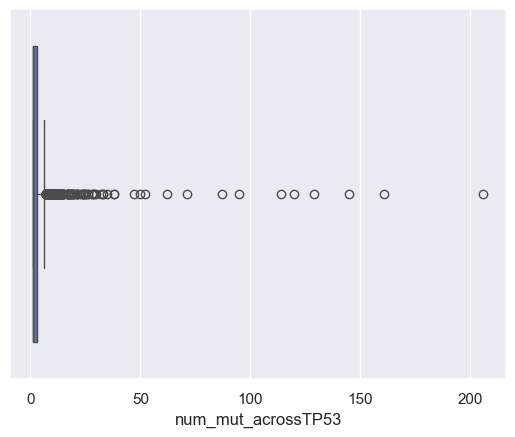

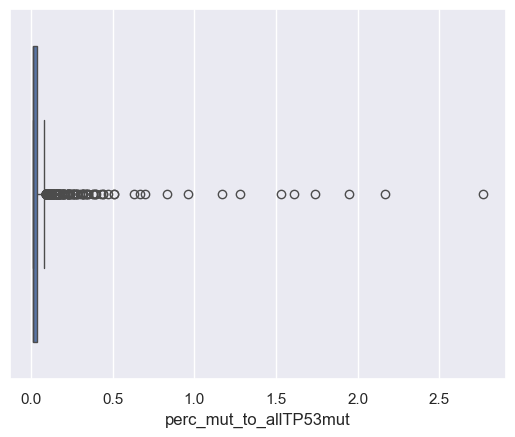

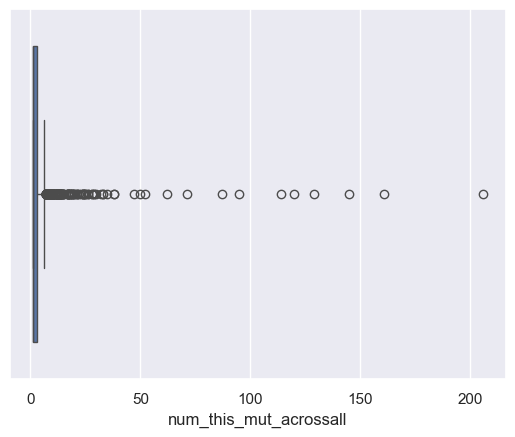

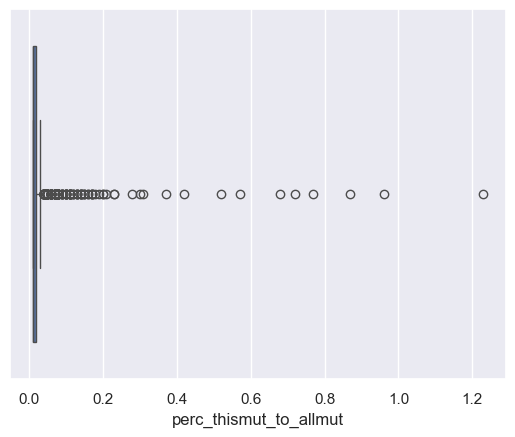

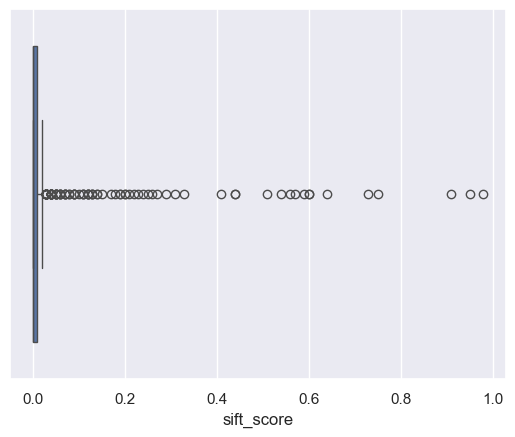

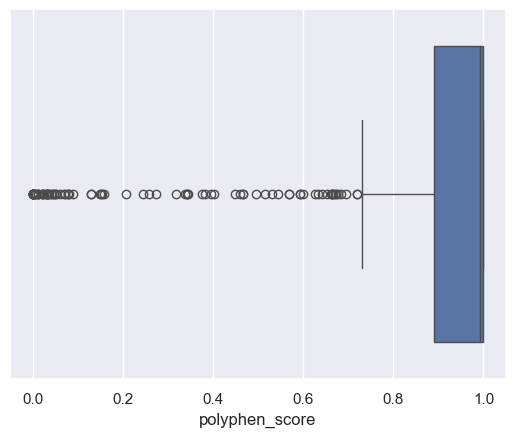

In [7]:
#поиск выбросов
#num_mut_acrossTP53 и perc_mut_to_allTP53mut - количество случаев, в которых была зарегестрирована эта мутация. Выбросы удалять не нужно, поскольку, вероятно, за выбросы будут встречаться самые частые мутации
sns.boxplot(x=df['num_mut_acrossTP53'])
plt.show()
sns.boxplot(x=df['perc_mut_to_allTP53mut'])
plt.show()

#num_this_mut_acrossall и perc_thismut_to_allmut - аналогично
sns.boxplot(x=df['num_this_mut_acrossall'])
plt.show()
sns.boxplot(x=df['perc_thismut_to_allmut'])
plt.show()

#значения индексов должны быть пределе от 0 до 1, что верно для данного дата сета
sns.boxplot(x=df['sift_score'])
plt.show()
sns.boxplot(x=df['polyphen_score'])
plt.show()

In [8]:
#дополнительная проверка что все значения индексов soft score и polyphen score находятся в пределах от 0 до 1
df_invalid = df[(df['sift_score'] < 0) | (df['sift_score'] > 1)]
if not df_invalid.empty:
    print('Следующие значения индексов sift score выходят за пределы от 0 до 1', df_invalid)
else:
    print('Все индексы sift score находятся в пределах от 0 до 1')

df_invalid = df[(df['polyphen_score'] < 0) | (df['polyphen_score'] > 1)]
if not df_invalid.empty:
    print('Следующие значения индексов polyphen score выходят за пределы от 0 до 1', df_invalid)
else:
    print('Все индексы polyphen score находятся в пределах от 0 до 1')

Все индексы sift score находятся в пределах от 0 до 1
Все индексы polyphen score находятся в пределах от 0 до 1


# Первичная оценка данных
Была проведена оценка объема анализа (количество изучаемых мутаций) и проверка содержимого категориальных столбцов 

In [9]:
#оценка объема данных
print('Количество изученных мутаций в TP53:', (df['num_all_TP53_mut'][0]))
print('Общее количество мутаций в базе данных:', (df['num_allmut'][0]))

Количество изученных мутаций в TP53: 7431
Общее количество мутаций в базе данных: 16747


In [10]:
#проверка значений в столбцах с типами мутаций и индексами, показывающими влияние на функционал белка
print('Типы мутаций', df['type_of_mutation'].unique())
print()
print('Варианты изменений трансрипта', df['consequence_for_transcript'].unique())
print()
print('vep_impact', df['vep_impact'].unique())
print()
print('sift_impact', df['sift_impact'].unique())
print()
print('polyphen_impact', df['polyphen_impact'].unique())
print()

Типы мутаций <StringArray>
['Substitution', 'Deletion', 'Insertion']
Length: 3, dtype: string

Варианты изменений трансрипта <StringArray>
[         'Missense',       'Stop Gained',     'Splice Region',
   'Splice Acceptor',        'Frameshift',      'Splice Donor',
  'Inframe Deletion',        'Synonymous',            'Intron',
 'Inframe Insertion',  'Protein Altering',        'Start Lost',
       '3 Prime Utr',     'Stop Retained',         'Stop Lost',
       '5 Prime Utr']
Length: 16, dtype: string

vep_impact <StringArray>
['MODERATE', 'HIGH', 'LOW', 'MODIFIER']
Length: 4, dtype: string

sift_impact <StringArray>
['tolerated', 'deleterious', <NA>, 'deleterious_low_confidence']
Length: 4, dtype: string

polyphen_impact <StringArray>
['benign', 'probably_damaging', 'possibly_damaging', <NA>]
Length: 4, dtype: string



# Изучение корреляций
Хорошая отрицательная корреляция между столбцами sift_score и polyphen_score подтверждает правильность подсчёта индексов.

Столбец perc_mut_to_allTP53mut явялется результатом деления значений толбца num_mut_acrossTP53 на фиксированное значение, что объясняет корреляцию 1. Однако, эти значения могут пригодиться в дальнейших расчётм, поэтому пока что мы не будет удалять эту величину.

Полная положительная корреляция между столбцами num_mut_acrossTP53 и num_this_mut_acrossall указывает на то, что столбцы содержат только одинаковые значения - оба столбца показывают количество мутаций такого типа в базе данных. Один из этих столбцов стоит удалить

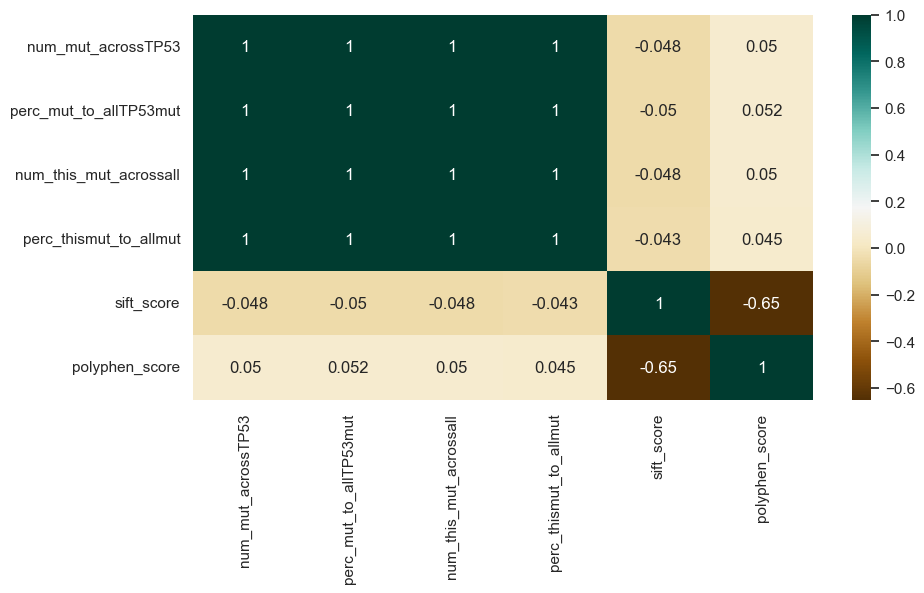

In [11]:
#строим heat map корреляций для столбюцов с числовыми значнеиями. Убирает столбцы num_all_TP55_mut и num_allmut, поскольку в этих столбцах только одно значение
plt.figure(figsize=(10,5))
cols = ['num_mut_acrossTP53', 'perc_mut_to_allTP53mut', 'num_this_mut_acrossall', 'perc_thismut_to_allmut', 'sift_score', 'polyphen_score']
c= df[cols].corr()
sns.heatmap(c,cmap="BrBG",annot=True)
plt.show()

In [12]:
#удаляем столбец num_this_mut_acrossall
df.drop('num_this_mut_acrossall', axis=1, inplace=True)
df = df.rename(columns={'num_mut_acrossTP53': 'num_TP53mut'})
df.head(4)

,ID,dna_change,protein_change,type_of_mutation,consequence_for_transcript,num_TP53mut,num_all_TP53_mut,perc_mut_to_allTP53mut,num_allmut,perc_thismut_to_allmut,vep_impact,sift_impact,sift_score,polyphen_impact,polyphen_score
0,8e30604f-3a45-5533-bdd7-0a4353700318,chr17:g.7675088C>T,TP53 R175H,Substitution,Missense,206,7431,2.77,16747,1.23,MODERATE,tolerated,0.11,benign,0.319
1,8d2dfec2-3a12-511c-90e9-3e29c039b548,chr17:g.7674220C>T,TP53 R248Q,Substitution,Missense,161,7431,2.17,16747,0.96,MODERATE,deleterious,0.00,probably_damaging,0.994
2,477e2125-974b-5af0-a876-25596d99ddbf,chr17:g.7673803G>A,TP53 R273C,Substitution,Missense,145,7431,1.95,16747,0.87,MODERATE,deleterious,0.00,probably_damaging,0.999
3,b5249474-20f8-5245-8dc0-c548405baaa2,chr17:g.7673802C>T,TP53 R273H,Substitution,Missense,129,7431,1.74,16747,0.77,MODERATE,tolerated,0.13,possibly_damaging,0.643


In [13]:
#сохраняем изменения в файл
df.to_parquet("data_afer_EDA.parquet", index=False)

# Выводы
Представленные данные достаточно высокго качества, не содержат дупликатов и выбросов, однако индексы влияния мутаций на функцию белка есть не для всех мутаций.
В дата сете содержаться данные как по часто встречаюшимся мутациям, так и по более редким мутациям, что позволяет создать более цельное представление о мутацийях в гене TP53. Наличие нескольких индексов для оценки влияния мутации на функцию белка нужно потому, что каждый индекс использует разные подходы и данные для предсказания, и ни один из них сам по себе не даёт полной картины. Поэтому наличие нескольих индексов позволит произвести более точный анализ.

# Визуализация Seaborn

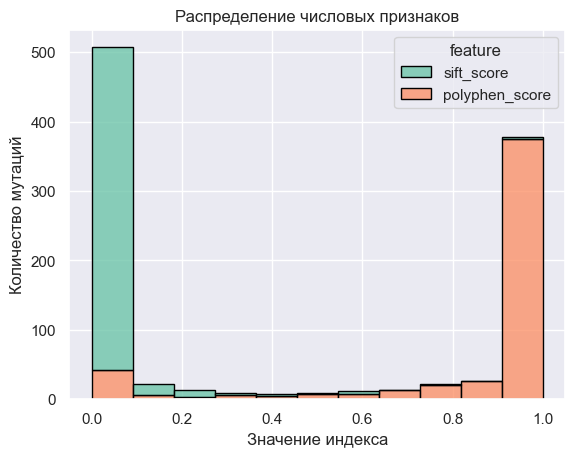

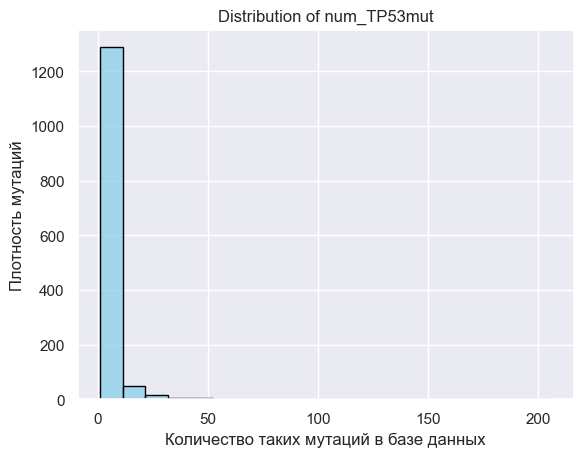

In [14]:
#Сетка распределений количественных признков

#признаки sift_score и polyphen_score
numeric_cols = ['sift_score', 'polyphen_score']
df_long = df[numeric_cols].melt(var_name='feature', value_name='value')
sns.histplot(
    data=df_long,
    x='value',
    hue='feature',
    multiple='stack',  # стэковка
    palette='Set2',
    edgecolor='black'
)

plt.title("Распределение числовых признаков")
plt.xlabel("Значение индекса")
plt.ylabel("Количество мутаций")
plt.show()

#распределение признака num_TP53mut - встречаемость изучаемых мутаций

sns.histplot(
    data=df,
    x='num_TP53mut',
    bins=20,          # можно изменить количество корзин
    color='skyblue',
    edgecolor='black'
)

plt.title("Distribution of num_TP53mut")
plt.xlabel("Количество таких мутаций в базе данных")
plt.ylabel("Плотность мутаций")
plt.show()

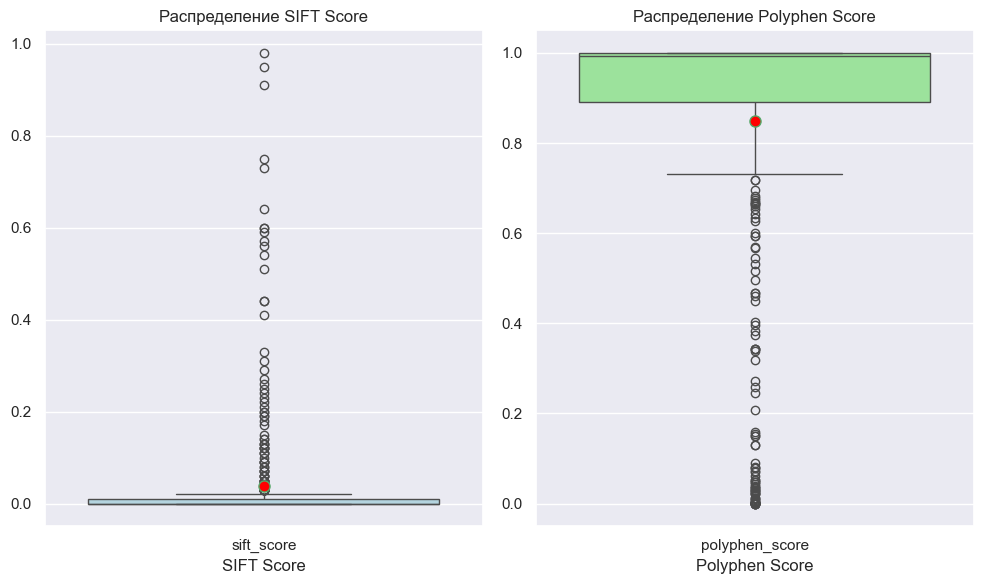

In [79]:
#распределение значение sift_score и polyphen_score. Красными точками показаны средние значения

# Создаем фигуру с двумя подграфиками
plt.figure(figsize=(10, 6))

# График для sift_score
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df[['sift_score']],
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markersize": 8},
    color='lightblue'
)
plt.title('Распределение SIFT Score')
plt.xlabel('SIFT Score')

# График для polyphen_score
plt.subplot(1, 2, 2)
sns.boxplot(
    data=df[['polyphen_score']],
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markersize": 8},
    color='lightgreen'
)
plt.title('Распределение Polyphen Score')
plt.xlabel('Polyphen Score')

# Настройка общего расположения графиков
plt.tight_layout()
plt.show()


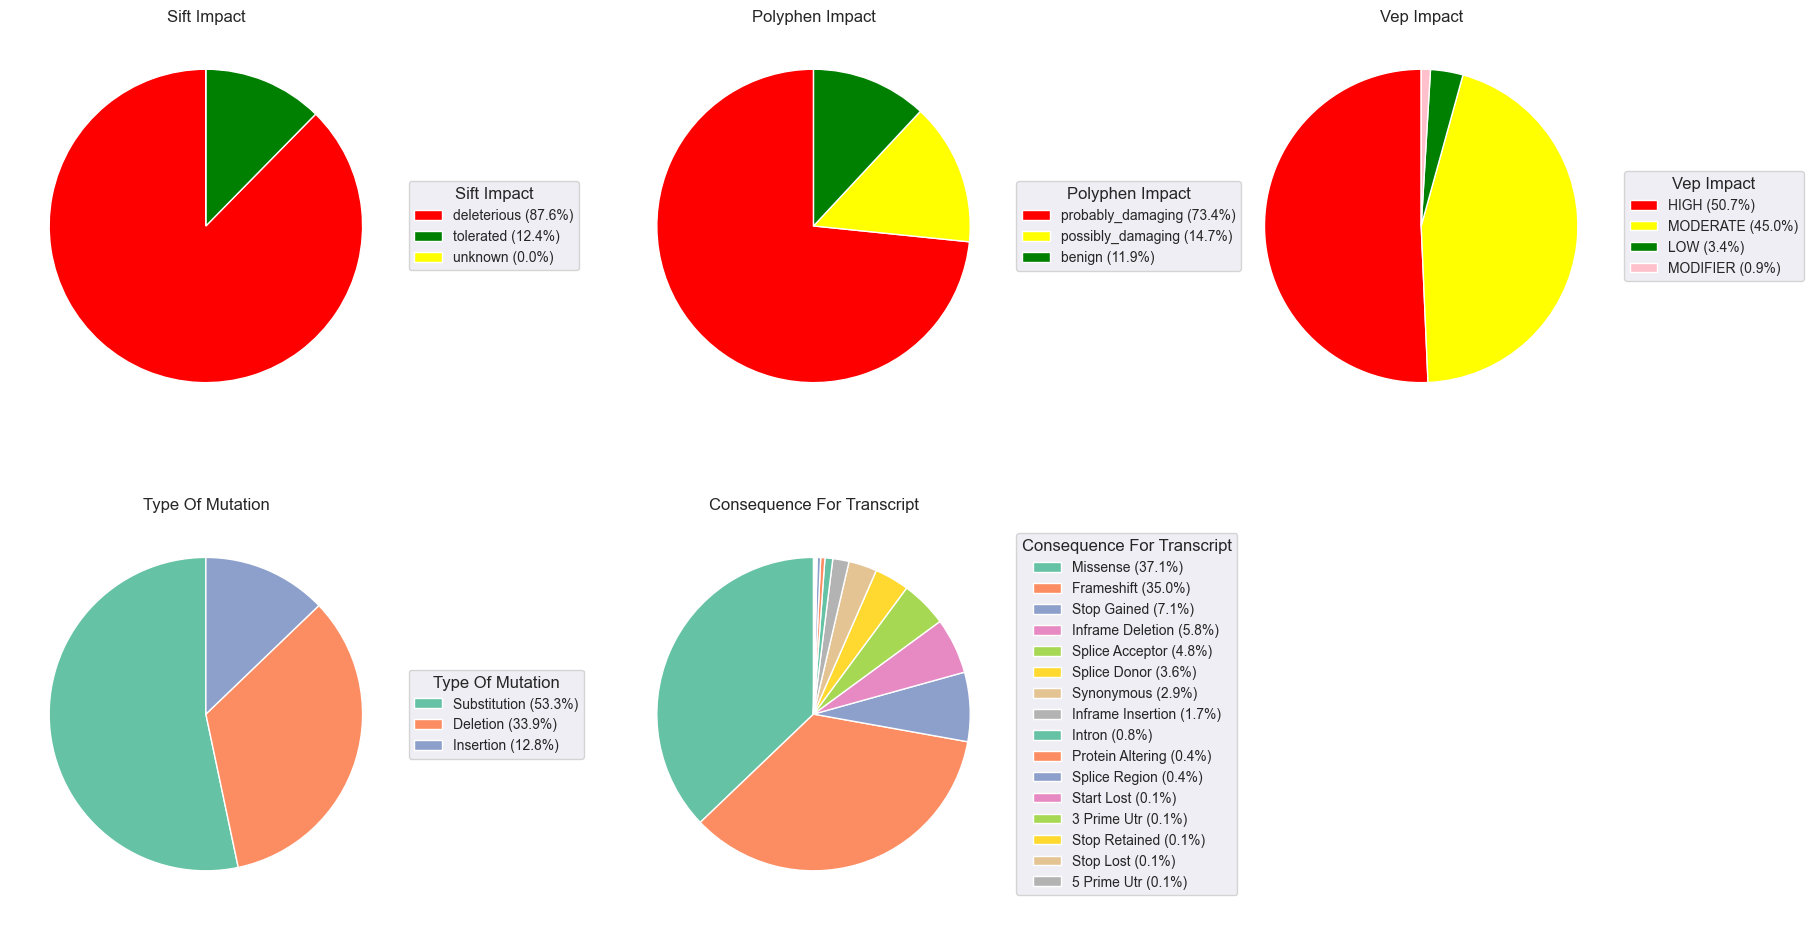

In [78]:
#распределение категориальных признаков
import matplotlib.pyplot as plt
import seaborn as sns

# Ваши данные и палитры
categorical_cols = ['sift_impact', 'polyphen_impact', 'vep_impact', 'type_of_mutation', 'consequence_for_transcript']
sift_palette = {'deleterious': 'red', 'tolerated': 'green', 'deleterious_low_confidence': 'yellow'}
polyphen_palette = {'probably_damaging': 'red', 'possibly_damaging': 'yellow', 'benign': 'green'}
vep_palette = {'HIGH': 'red', 'MODERATE': 'yellow', 'LOW': 'green', 'MODIFIER': 'pink'}

# Создаем фигуру с сеткой 2x3
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    
    # Определяем палитру и порядок категорий
    if col == 'sift_impact':
        palette = [sift_palette[k] for k in ['deleterious', 'tolerated', 'deleterious_low_confidence']]
        order = ['deleterious', 'tolerated', 'deleterious_low_confidence']
    elif col == 'polyphen_impact':
        palette = [polyphen_palette[k] for k in ['probably_damaging', 'possibly_damaging', 'benign']]
        order = ['probably_damaging', 'possibly_damaging', 'benign']
    elif col == 'vep_impact':
        palette = [vep_palette[k] for k in ['HIGH', 'MODERATE', 'LOW', 'MODIFIER']]
        order = ['HIGH', 'MODERATE', 'LOW', 'MODIFIER']
    else:
        order = df[col].value_counts().index
        palette = plt.cm.Set2.colors[:len(order)]
    
    # Данные для pie chart
    counts = df[col].value_counts().reindex(order).fillna(0)
    total = counts.sum()
    percentages = counts / total * 100
    
    wedges, texts = ax.pie(
        counts,
        labels=None,  # Убираем метки на графиках
        colors=palette,
        startangle=90,
        labeldistance=1.4  # Располагаем метки за пределами
    )
    ax.set_title(col.replace("_", " ").title())
    
    # Создаем метки для легенды с процентами
    legend_labels = [f'{label} ({percent:.1f}%)' for label, percent in zip(order, percentages)]
    
    # Настройка легенды
    ax.legend(
        wedges,
        legend_labels,
        title=col.replace("_", " ").title(),
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=10
    )

# Последний слот пустой
axes[-1].axis('off')

plt.tight_layout()
plt.show()


C:\Users\Поля\AppData\Local\Temp\ipykernel_13432\1331967713.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\Поля\AppData\Local\Temp\ipykernel_13432\1331967713.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


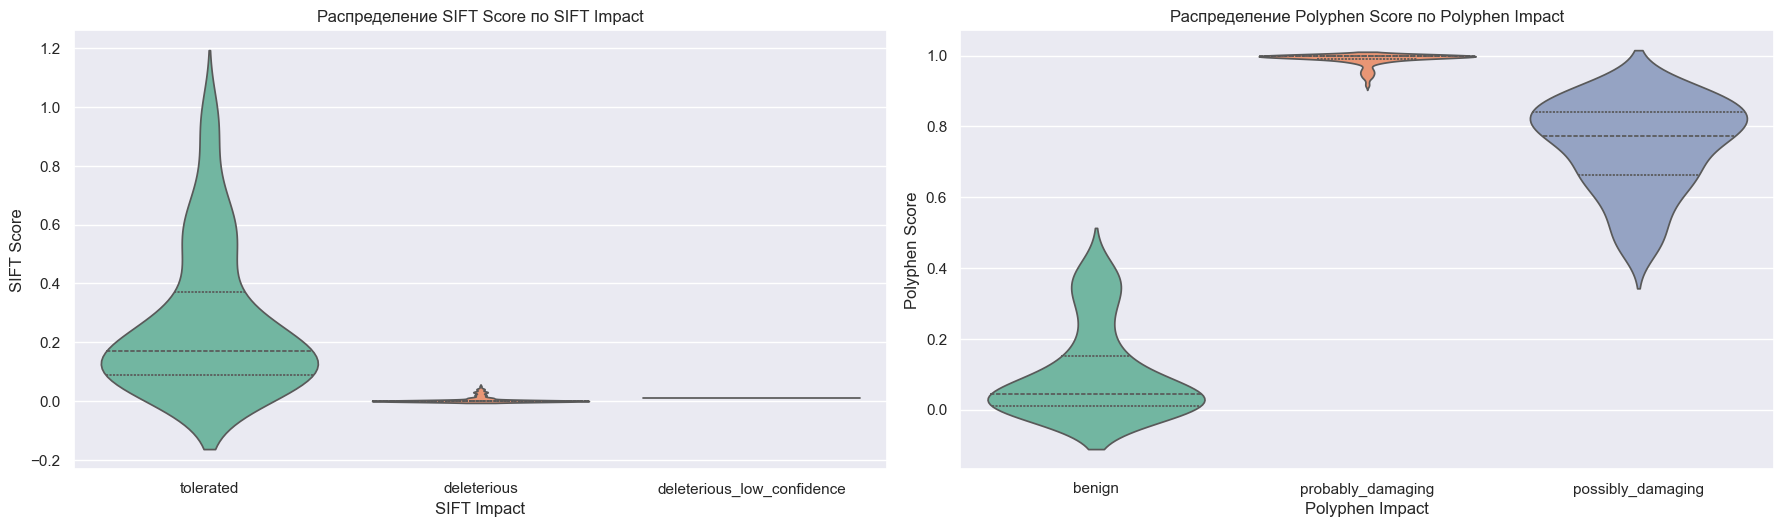

In [15]:
#распределение sift score по sift impact и polyphen score по polyphen impact в виде графика-виолончели
#Настройка размеров графика
plt.figure(figsize=(18, 10))

#Виолончельная диаграмма для sift_score по sift_impact
plt.subplot(2, 2, 1)
sns.violinplot(
    x='sift_impact', y='sift_score', data=df,
    palette='Set2', inner='quart', linewidth=1.25
)
plt.title('Распределение SIFT Score по SIFT Impact')
plt.xlabel('SIFT Impact')
plt.ylabel('SIFT Score')

#Виолончельная диаграмма для polyphen_score по polyphen_impact
plt.subplot(2, 2, 2)
sns.violinplot(
    x='polyphen_impact', y='polyphen_score', data=df,
    palette='Set2', inner='quart', linewidth=1.25
)
plt.title('Распределение Polyphen Score по Polyphen Impact')
plt.xlabel('Polyphen Impact')
plt.ylabel('Polyphen Score')


plt.tight_layout()
plt.show()


C:\Users\Поля\AppData\Local\Temp\ipykernel_13432\4145730023.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


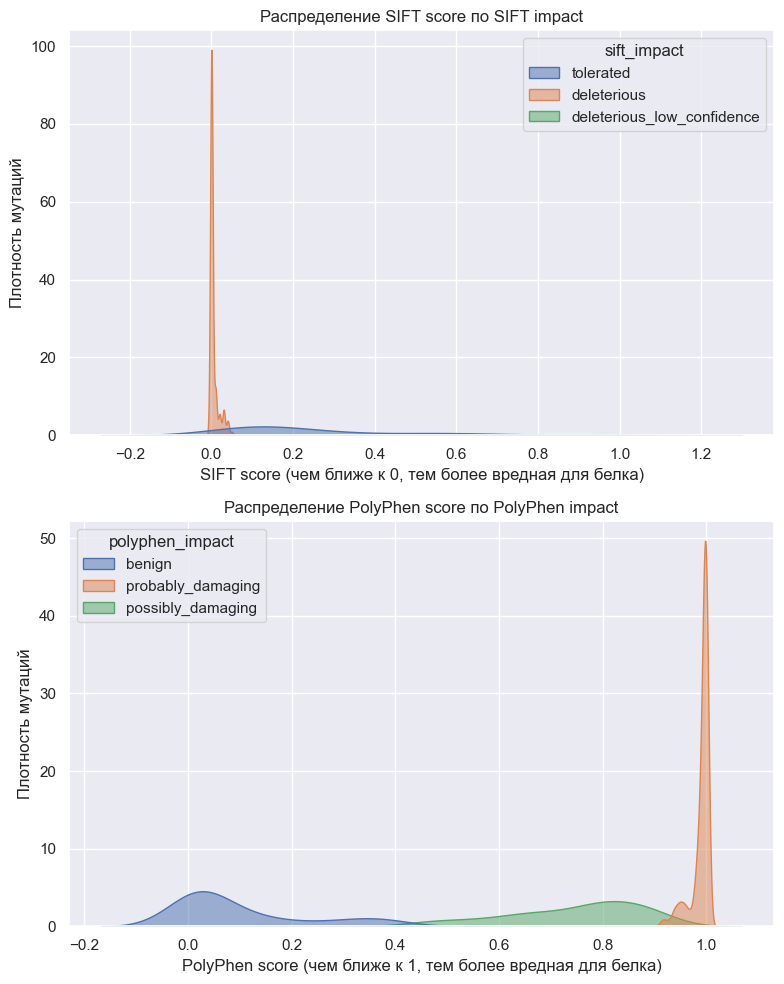

In [16]:
#распределение sift score по sift impact и polyphen score по polyphen impact в виде гистрограммы
#каждая кривая показывает распределение score для соотвествуюшего impact

numeric_categorical_pairs = [
    ('sift_score', 'sift_impact'),
    ('polyphen_score', 'polyphen_impact')
]

fig, axes = plt.subplots(len(numeric_categorical_pairs), 1, figsize=(8, 5*len(numeric_categorical_pairs)))

for i, (num_col, cat_col) in enumerate(numeric_categorical_pairs):
    sns.kdeplot(
        data=df,
        x=num_col,
        hue=cat_col,
        fill=True,            # заливка под кривой
        common_norm=False,    # нормировка по каждой категории отдельно
        alpha=0.5,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {num_col} by {cat_col}')
    axes[i].set_xlabel(num_col)
    axes[i].set_ylabel('Density')

#Переименование осей
    if num_col == 'sift_score':
        axes[i].set_xlabel("SIFT score (чем ближе к 0, тем более вредная мутация для белка)")
        axes[i].set_ylabel("Плотность мутаций")
        axes[i].set_title("Распределение SIFT score по SIFT impact")
    elif num_col == 'polyphen_score':
        axes[i].set_xlabel("PolyPhen score (чем ближе к 1, тем более вредная мутация для белка)")
        axes[i].set_ylabel("Плотность мутаций")
        axes[i].set_title("Распределение PolyPhen score по PolyPhen impact")


plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

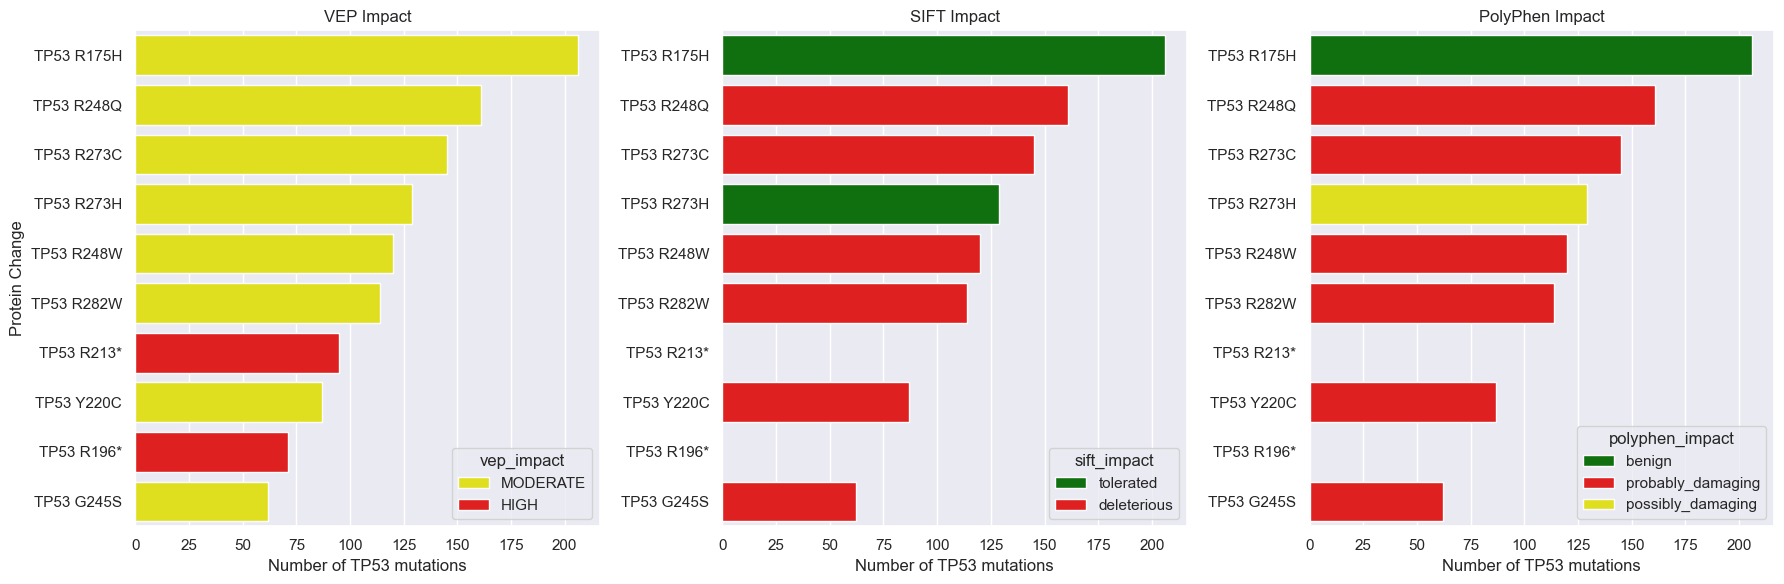

In [29]:
#визуализация значений индексов vep_impact, sift_impact, polyphen_impact для 10 наиболее часто встречающихся мутаций

# Сортируем по num_TP53mut и берем топ-10
top10 = df.sort_values('num_TP53mut', ascending=False).head(10)

# Настраиваем палитры
sift_palette = {'deleterious': 'red', 'tolerated': 'green', 'deleterious_low_confidence': 'yellow'}
polyphen_palette = {'probably_damaging': 'red', 'possibly_damaging': 'yellow', 'benign': 'green'}
vep_palette = {'HIGH': 'red', 'MODERATE': 'yellow', 'LOW': 'green', 'MODIFIER': 'pink'}

# Создаем фигуру с тремя графиками
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# VEP
sns.barplot(
    data=top10,
    y='protein_change',
    x='num_TP53mut',
    hue='vep_impact',
    dodge=False,
    palette=vep_palette,
    ax=axes[0]
)
axes[0].set_title('VEP Impact')
axes[0].set_xlabel('Number of TP53 mutations')
axes[0].set_ylabel('Protein Change')

# SIFT
sns.barplot(
    data=top10,
    y='protein_change',
    x='num_TP53mut',
    hue='sift_impact',
    dodge=False,
    palette=sift_palette,
    ax=axes[1]
)
axes[1].set_title('SIFT Impact')
axes[1].set_xlabel('Number of TP53 mutations')
axes[1].set_ylabel('')

# PolyPhen
sns.barplot(
    data=top10,
    y='protein_change',
    x='num_TP53mut',
    hue='polyphen_impact',
    dodge=False,
    palette=polyphen_palette,
    ax=axes[2]
)
axes[2].set_title('PolyPhen Impact')
axes[2].set_xlabel('Number of TP53 mutations')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()




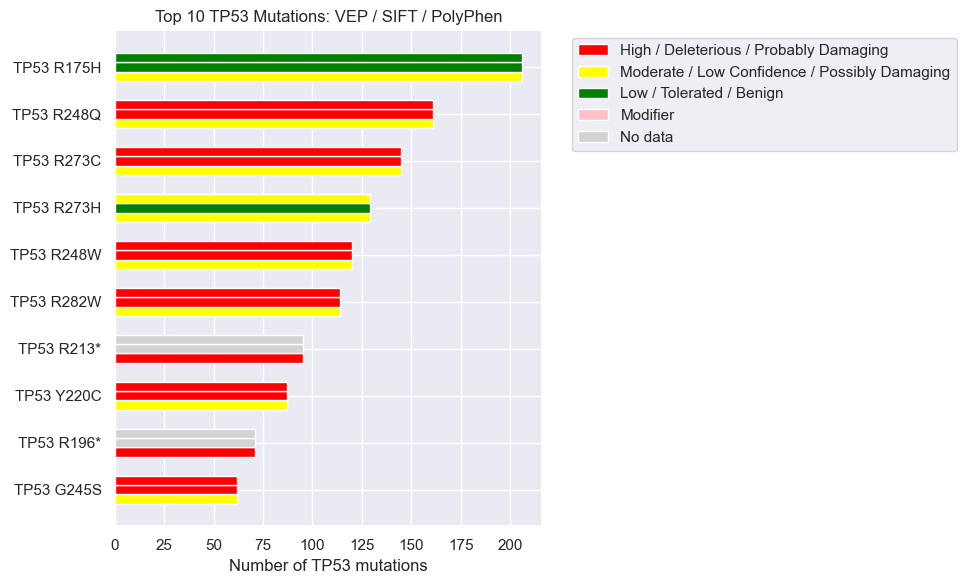

In [35]:
#визуализация значений индексов vep_impact, sift_impact, polyphen_impact для 10 наиболее часто встречающихся мутаций

#Берем топ-10 мутаций
top10 = df.sort_values('num_TP53mut', ascending=False).head(10)

# Настраиваем палитры
sift_palette = {'deleterious': 'red', 'tolerated': 'green', 'deleterious_low_confidence': 'yellow'}
polyphen_palette = {'probably_damaging': 'red', 'possibly_damaging': 'yellow', 'benign': 'green'}
vep_palette = {'HIGH': 'red', 'MODERATE': 'yellow', 'LOW': 'green', 'MODIFIER': 'pink'}

y_pos = range(len(top10))
bar_height = 0.2  # высота каждой полоски

fig, ax = plt.subplots(figsize=(10, 6))

for i, (_, row) in enumerate(top10.iterrows()):
    # VEP
    ax.barh(i + bar_height, row['num_TP53mut'], height=bar_height, color=vep_palette.get(row['vep_impact'], 'lightgray'))
    # SIFT
    ax.barh(i, row['num_TP53mut'], height=bar_height, color=sift_palette.get(row['sift_impact'], 'lightgray'))
    # PolyPhen
    ax.barh(i - bar_height, row['num_TP53mut'], height=bar_height, color=polyphen_palette.get(row['polyphen_impact'], 'lightgray'))

y_labels = top10['protein_change']
ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels)


ax.invert_yaxis()
ax.set_xlabel('Number of TP53 mutations')
ax.set_title('Top 10 TP53 Mutations: VEP / SIFT / PolyPhen')

#Легенда
legend_elements = [
    Patch(facecolor='red', label='High / Deleterious / Probably Damaging'),
    Patch(facecolor='yellow', label='Moderate / Low Confidence / Possibly Damaging'),
    Patch(facecolor='green', label='Low / Tolerated / Benign'),
    Patch(facecolor='pink', label='Modifier'),
    Patch(facecolor='lightgray', label='No data')
]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
